In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import matplotlib as mlp

# mglearn에서 경로 불러오기가 에러나서, 직접 url로 들어가 링크 복사 후 경로로 설정해줌
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, index_col=False)

In [2]:
#현재는 header=None 이므로 여기에 이름을 붙여줘야함
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#데이터 컬럼에 이름을 다 붙여줌 (adult.names 참고)

data.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
              'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#필요한 데이터 컬럼만 뽑아서 추출
data = data[['age','workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
#성별은 male, female 로만 입력이 되있음을 확인 (데이터 누락 방지)
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [6]:
#age와 hours-per-week는 연속형 특성이라 입력값의 범위가 많아 get_dummies 함수 사용 어려움

unique_len = data.apply(lambda x : len(x.unique()))
unique_len

age               73
workclass          9
education         16
gender             2
hours-per-week    94
occupation        15
income             2
dtype: int64

In [7]:
#pandas에서 get_dummies 함수를 사용해 데이터 인코딩 가능 -> 객체타입(문자열)이나 범주형을 가진 열을 자동으로 변환
#범주형 특성은 값마다 새로운 특성으로 확장됨

print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [8]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
#pandas에서는 범위를 지정할때 끝에 행도 포함됨 / numpy는 포함안됨

features = data_dummies.loc[:,'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ >50K'].values
print("X.shaep: {} y.shape: {}".format(X.shape, y.shape))

features.head()

X.shaep: (32561, 44) y.shape: (32561,)


,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
#로지스틱 회귀분석

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("테스트 점수:{:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수:0.81


In [11]:
#k-NN 알고리즘

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("테스트 점수:{:.2f}".format(clf.score(X_test,y_test)))

테스트 점수:0.77


In [12]:
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1], '범주형 특성': ['양말','여우','양말','상자']})

display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [13]:
#숫자 특성을 제외한 범주형 특성이 get_dummies 함수로 인코딩 됨

display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [14]:
#숫자 특성도 인코딩해줌

demo_df['숫자 특성']=demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [15]:
#scikit-learn은 원핫인코딩이 가능하며 sparse=False는 numpy 배열로 반환

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [16]:
#sparse=True 이면 희소 행렬로 반환
#ohe = OneHotEncoder(sparse=True)
#print(ohe.fit_transform(demo_df))

In [17]:
#sklearn의 출력은 DataFrame이 아니므로 열 이름이 없으며 원본 범주형 변수 이름을 얻기 위해 get_feature_nemae 메서드 사용

print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([("scaling", StandardScaler(), ['age','hours-per-week']), ("onehot", OneHotEncoder(sparse=False),
                        ['workclass','education','gender','occupation'])])

In [19]:
#위의 경우와 비교해보면 X.shaep: (32561, 44) 로 44개의 특성의 개수는 같음

data_features = data.drop("income", axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [20]:
#스케일을 조정하기 전과 테스트 점수가 같음 -> 스케일이 영향을 미치지 않았다는 의미

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)
X_test_trans = ct.transform(X_test)
print("테스트 점수:{:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수:0.81


In [21]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

In [22]:
#0.20버전에서 변환된 출력 열에 대응하는 열을 찾지 못한다는 단점이 있음

from sklearn.compose import make_column_transformer
ct = make_column_transformer((['age', 'hours-per-week'], StandardScaler()),(['workclass','education','gender','occupation'],
                              OneHotEncoder(sparse=False)))

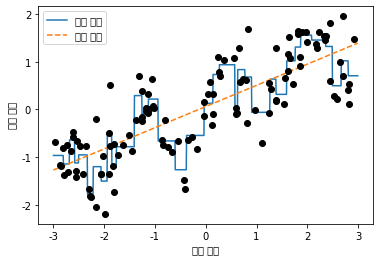

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

dreg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, dreg.predict(line), label="결정 트리")

lreg = LinearRegression().fit(X, y)
plt.plot(line, lreg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

#한글 출력 에러시 입력
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name= font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#경고메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 

In [24]:
#결정트리의 점수가 더 높음
print("LinearRegression score:{:.2f}".format(lreg.score(X, y)))
print("DecisionTreeRegressor score:{:.2f}".format(dreg.score(X, y)))

LinearRegression score:0.63
DecisionTreeRegressor score:0.86


In [25]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, '입력 특성')

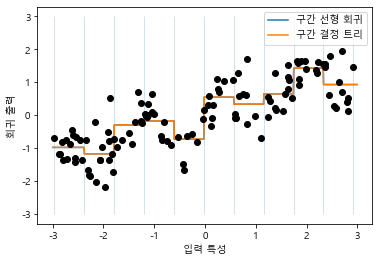

In [26]:
line_binned = kb.transform(line)

lreg = LinearRegression().fit(X_binned, y)
plt.plot(line, lreg.predict(line_binned), label='구간 선형 회귀')

dreg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, dreg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

In [27]:
#구간으로 변환하여 원핫인코딩 후 구간별 예측 값이 상수값이며 점수 차이가 없음
#결정트리는 구간나누기가 별로 도움이 안되고 고차원 데이터의 선형모델에 구축시 구간나누기가 유용

print("LinearRegression score:{:.2f}".format(lreg.score(X_binned, y)))
print("DecisionTreeRegressor score:{:.2f}".format(dreg.score(X_binned, y)))

LinearRegression score:0.72
DecisionTreeRegressor score:0.72


(120, 11)
[[-0.75275929  0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.        ]
 [ 2.70428584  0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.        ]
 [ 1.39196365  0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.        ]
 [ 0.59195091  0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.        ]
 [-2.06388816  0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]


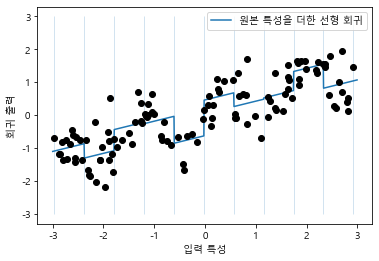

In [28]:
#기존 데이터를 이용하여 데이터의 특성을 강화
#입력 특성이 하나라서 구간의 기울기가 같음

X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
print(X_combined[:5])

reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')

(120, 20)
[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.         -0.         -0.
  -0.         -0.75275929 -0.         -0.         -0.         -0.
  -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          2.70428584]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.39196365
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.59195091  0.
   0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0

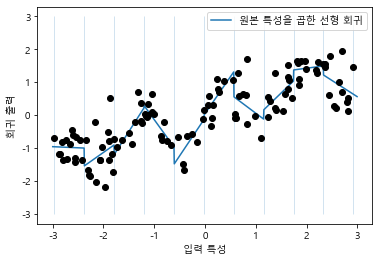

In [29]:
#구간과 원본 특성을 곱한 값을 추가(20개 특성)
#구간별 기울기와 절편이 다름

X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)
print(X_product[:5])

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [30]:
#10차원을 사용했으므로 10개의 특성이 만들어짐

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print("X_poly.shape: ", X_poly.shape)

X_poly.shape:  (120, 10)


score: 0.73


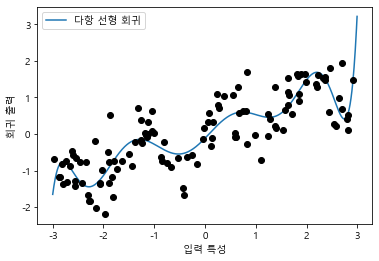

In [31]:
#다항식 특성을 선형 모델과 사용하면 다항회귀(poly regression) 모델이 됨

lreg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, lreg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

print("score: {:.2f}".format(lreg.score(X_poly, y)))

gamma = 1 score: 0.75
gamma = 10 score: 0.79


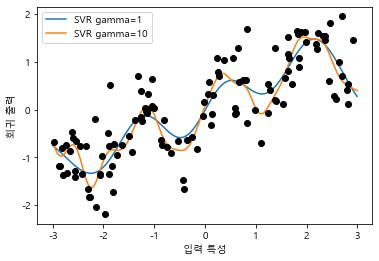

In [32]:
#gamma 는 커널 폭의 역수로 작은값은 넓은 커널 영역이며 많은 포인트를 고려
#큰값은 각 포인트에 민감하다 (빨간색)

from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    print("gamma =",gamma, "score: {:.2f}".format(svr.score(X,y)))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [33]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

print("다항 특성 이름:\n", poly.get_feature_names())

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)
다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [34]:
#상호작용 특성이 있을 때 점수가 향상됨

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [35]:
#랜덤포레스트의 경우 상호작용 특성이 있을 때 오히려 점수가 낮아진 것이 보임
#특성을 추가하지 않아도 릿지와 성능이 비슷함

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


In [36]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

print(X_org[:50, 0])
print(X[:50, 0])

[ 1.76405235  2.2408932   0.95008842  0.4105985   0.76103773  0.33367433
  0.3130677   0.6536186   2.26975462 -0.18718385  0.15494743 -1.98079647
  1.23029068 -0.30230275 -1.70627019 -0.4380743  -1.61389785  0.3869025
 -0.02818223  0.3024719  -0.67246045 -1.7262826  -1.63019835  0.0519454
  1.13940068 -0.68481009 -0.31155253  0.90082649  1.48825219 -0.17992484
 -0.40317695  0.97663904  0.01050002  0.40198936 -1.270485    1.94362119
  1.92294203  0.90604466 -0.26800337 -0.15501009  0.37642553  1.3263859
 -0.43515355  0.40746184 -0.67433266  0.67643329  0.39600671  0.4393917
  2.38314477  1.11701629]
[ 56  81  25  20  27  18  12  21 109   7  15   1  27   4   1   7   2  11
   6  18   1   2   2   7  31   7   7  28  37   9   8  21   7  20   3  71
  69  27   9   7  12  43   9  18   4  21  16  12 120  33]


Text(0.5, 0, '값')

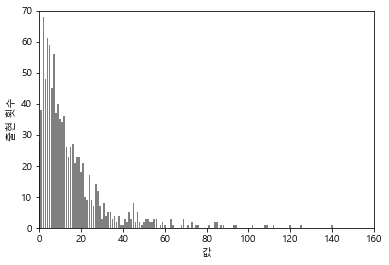

In [37]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [38]:
print("특성 출현 횟수: \n{}".format(np.bincount(X[:,0].astype('int'))))

특성 출현 횟수: 
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [39]:
#점수가 낮음 ->릿지가 X, y 관계를 제대로 모델링 하지 못함을 의미
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


Text(0.5, 0, '값')

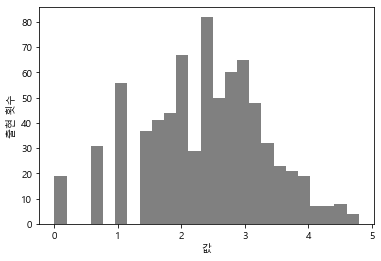

In [40]:
#0값은 log적용이 안되므로 +1해줌

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [41]:
#카운트를 예측하는 경우에는 log(y+1)을 사용해 변환하면 도움이 됨
#점수가 향상됨을 볼 수 있음 -> 선형 모델에서는 필수

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

#40개로 축소되었음 ->원본의 일부가 선택되지 않음

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x22b1d374eb0>], [Text(0, 0, '')])

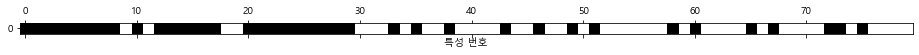

In [43]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [44]:
#점수가 같게 나옴 (max_iter=1000)

X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.940
선택된 일부 특성을 사용한 점수: 0.940


In [45]:
#max_iter값을 default 값으로 하면 40개의 특성으로 조정한 것이 점수가 조금 더 높음

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.916
선택된 일부 특성을 사용한 점수: 0.919


In [46]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
select = SelectPercentile(score_func=f_classif, percentile=20)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 16)


In [47]:
#50%, 16개 사용시에는 점수 차이가 확 남 -> 일부 특성만 사용한 것이 점수가 더 높음
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.916
선택된 일부 특성을 사용한 점수: 0.958


X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)
[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]


Text(0.5, 0, '특성 번호')

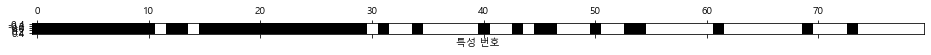

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

#0~29의 원본 중 2개 미포함을 시각화로 알 수 있음

In [49]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


In [50]:
#max_iter=5000 일때, 점수는 0.95정도 / default value =100
#max_iter = solver가 수렵하는 데 걸리는 최대 반복 횟수
#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)


X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.947


Text(0.5, 0, '특성 번호')

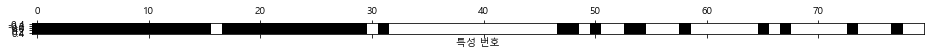

In [51]:
#원본 특성 중 1개 누락 (0~29중에서)
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [52]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))
print("X_test_rfe의 shape: ",X_test_rfe.shape)
#40개 특성 사용했을 때 점수는 0.930

테스트 점수: 0.930
X_test_rfe의 shape:  (285, 40)


In [53]:
#0.940으로 향상됨 (max_iter=5000)
score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("max_iter = 5000 테스트 점수: {:.3f}".format(score))

score = LogisticRegression(max_iter=1000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("max_iter = 1000 테스트 점수: {:.3f}".format(score))

max_iter = 5000 테스트 점수: 0.940
max_iter = 1000 테스트 점수: 0.951


In [54]:
print("랜덤포레스트 테스트 점수: {:.3f}".format(select.score(X_test,y_test)))

#logistic regression 의 경우 max_iter=1000,특성이 40개 사용될때 random forest의 성능 점수와 비슷하게 향상됨

랜덤포레스트 테스트 점수: 0.951


In [55]:
#데이터 불러오기 에러나서 경로 설정을 변경해줌
#3시간 단위로 대여횟수 계산

def load_citibike():
    data_mine = pd.read_csv('../data/citibike.csv')
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one

citibike=load_citibike()

In [56]:
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

Text(0, 0.5, '대여횟수')

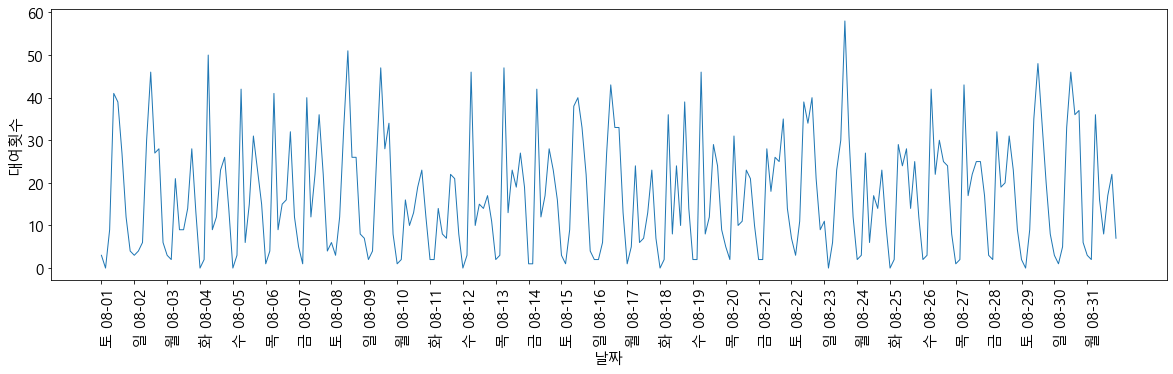

In [57]:
#이 대여소에서의 일별 대여횟수 시각화 (2015.8.기준)
#대체적으로 월,화가 대여횟수가 적음

plt.figure(figsize=(20, 5))
plt.rc('font', size=15)
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [58]:
#타깃 값 추출 (대여 횟수)
y = citibike.values
#날짜와 시간을 하나의 숫자로 표현 (정수형으로 변환)
X = citibike.index.astype("int64").values.reshape(-1, 1) 

print(X)

[[1438387200000000000]
 [1438398000000000000]
 [1438408800000000000]
 [1438419600000000000]
 [1438430400000000000]
 [1438441200000000000]
 [1438452000000000000]
 [1438462800000000000]
 [1438473600000000000]
 [1438484400000000000]
 [1438495200000000000]
 [1438506000000000000]
 [1438516800000000000]
 [1438527600000000000]
 [1438538400000000000]
 [1438549200000000000]
 [1438560000000000000]
 [1438570800000000000]
 [1438581600000000000]
 [1438592400000000000]
 [1438603200000000000]
 [1438614000000000000]
 [1438624800000000000]
 [1438635600000000000]
 [1438646400000000000]
 [1438657200000000000]
 [1438668000000000000]
 [1438678800000000000]
 [1438689600000000000]
 [1438700400000000000]
 [1438711200000000000]
 [1438722000000000000]
 [1438732800000000000]
 [1438743600000000000]
 [1438754400000000000]
 [1438765200000000000]
 [1438776000000000000]
 [1438786800000000000]
 [1438797600000000000]
 [1438808400000000000]
 [1438819200000000000]
 [1438830000000000000]
 [1438840800000000000]
 [143885160

테스트 세트 R^2: -0.04


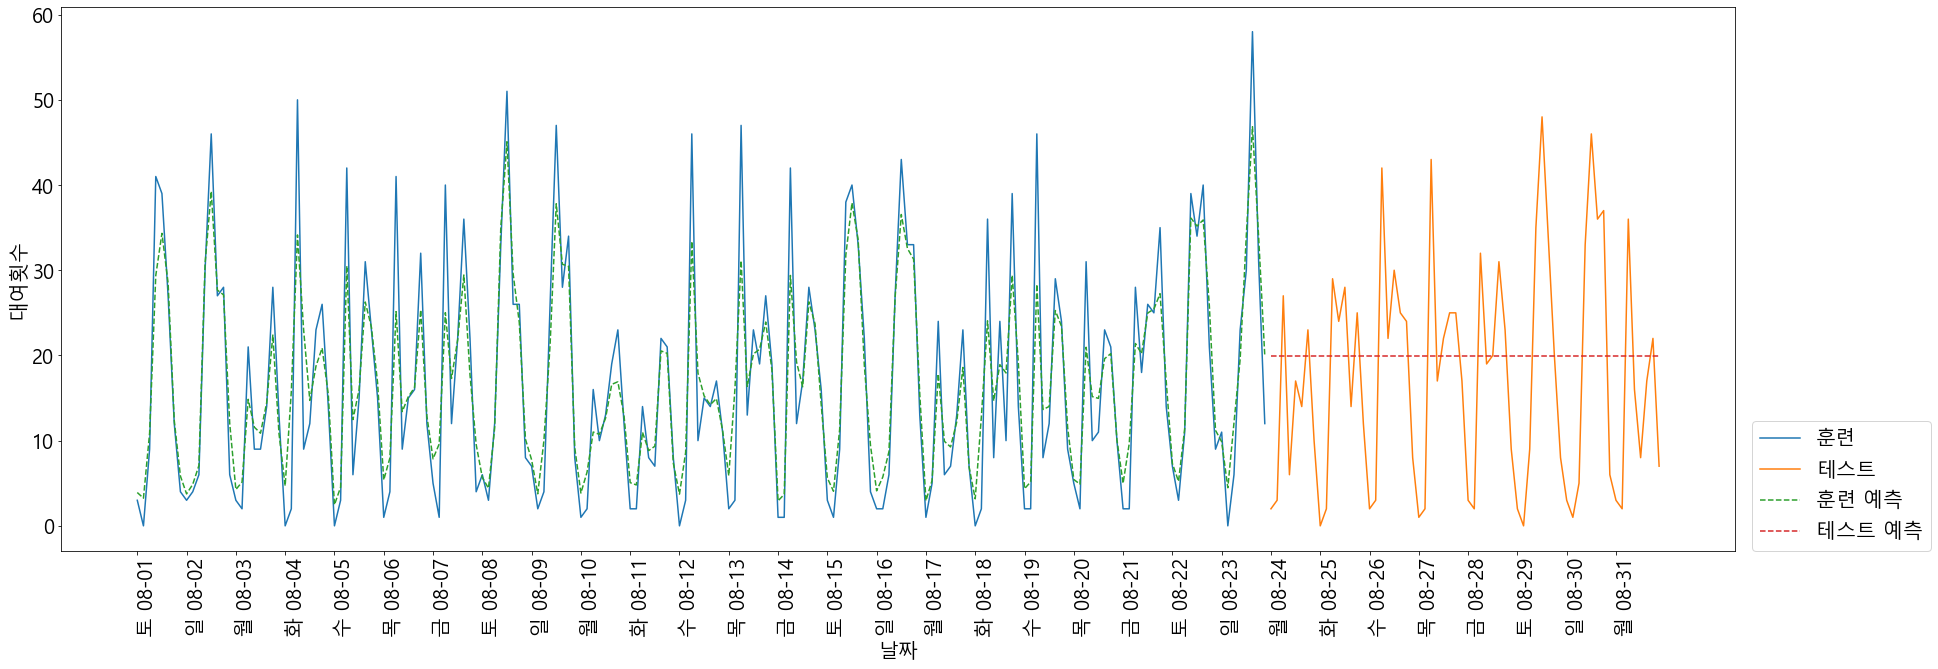

In [59]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(30,10))
    plt.rc('font', size=20)
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

#테스트 부분을 보면 테스트 예측이 일직선으로 나타남 -> 거의 아무것도 학습되지 않았다는 의미

테스트 세트 R^2: 0.60


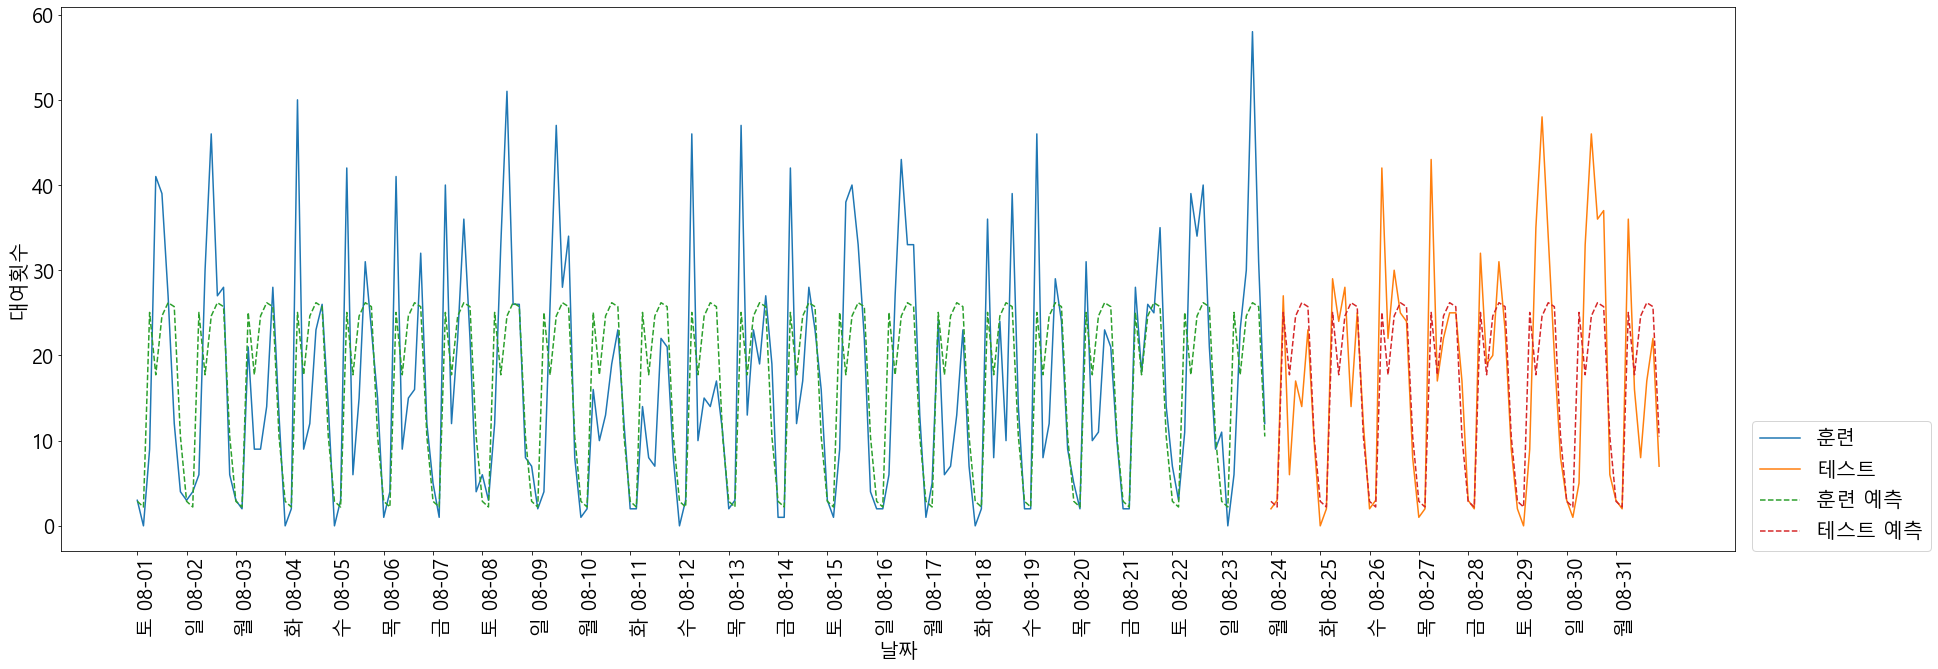

In [60]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

#시간만 사용했을 경우 아까보다 훨씬 나아짐 -> 하지만 패턴이 비슷함

테스트 세트 R^2: 0.84


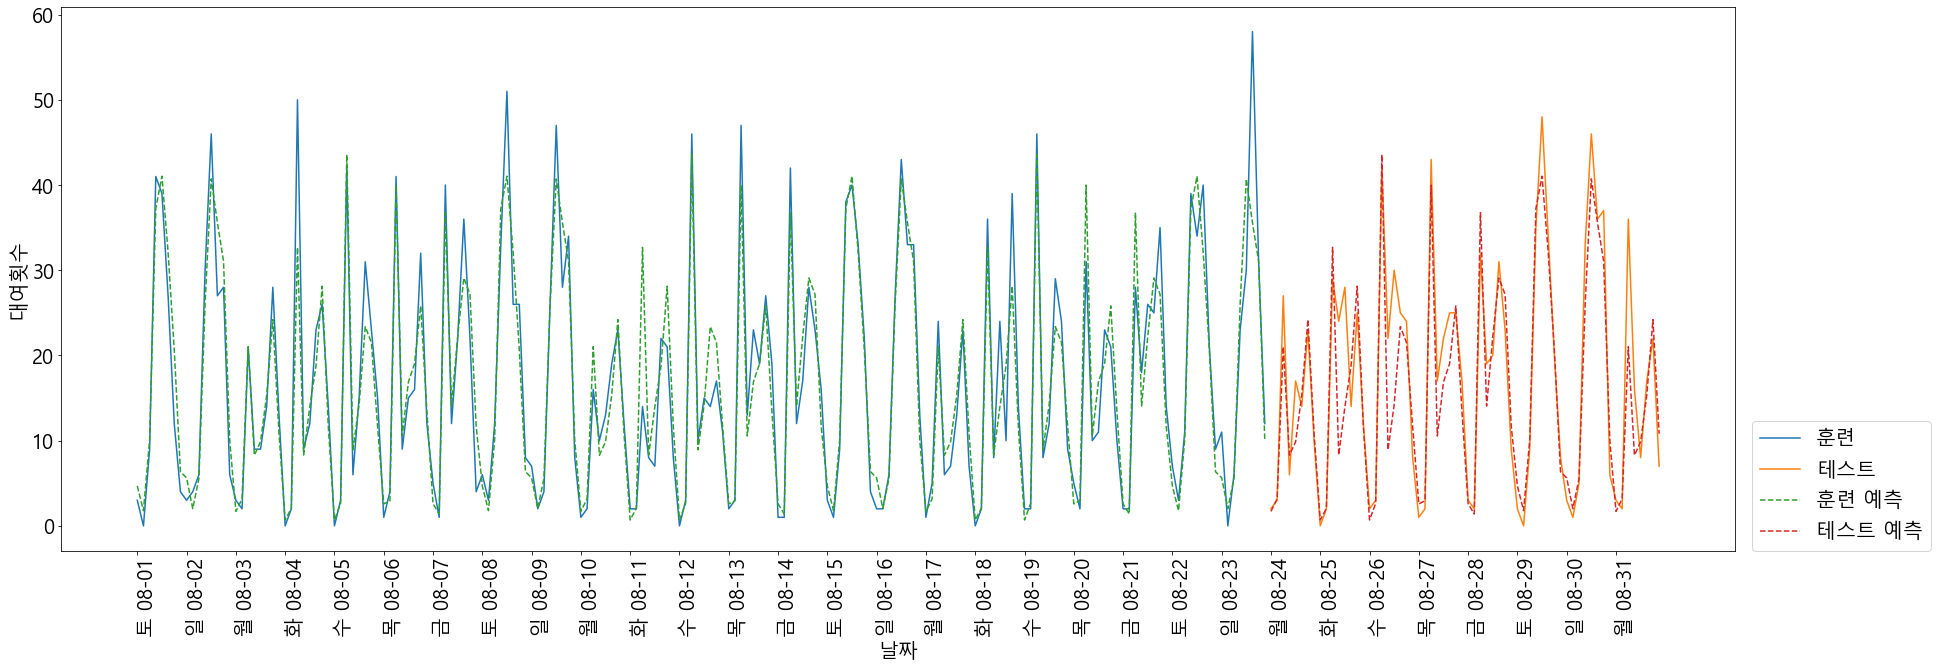

In [61]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

# 시간과 요일이라는 두 요소를 추가하니 성능이 향상되었다는 것을 볼 수 있음 -> 요일과 시간의 주기성을 찾아냄
# 결정계수(R-squqred) 값이 높을수록 독립변수가 종속변수를 많이 설명해주고 있음을 뜻함
# 값이 높다고 무조건 좋다고 설명할 수는 없지만 현재 데이터에서는 잘 설명해주고 있다고 판단되어짐

테스트 세트 R^2: 0.13


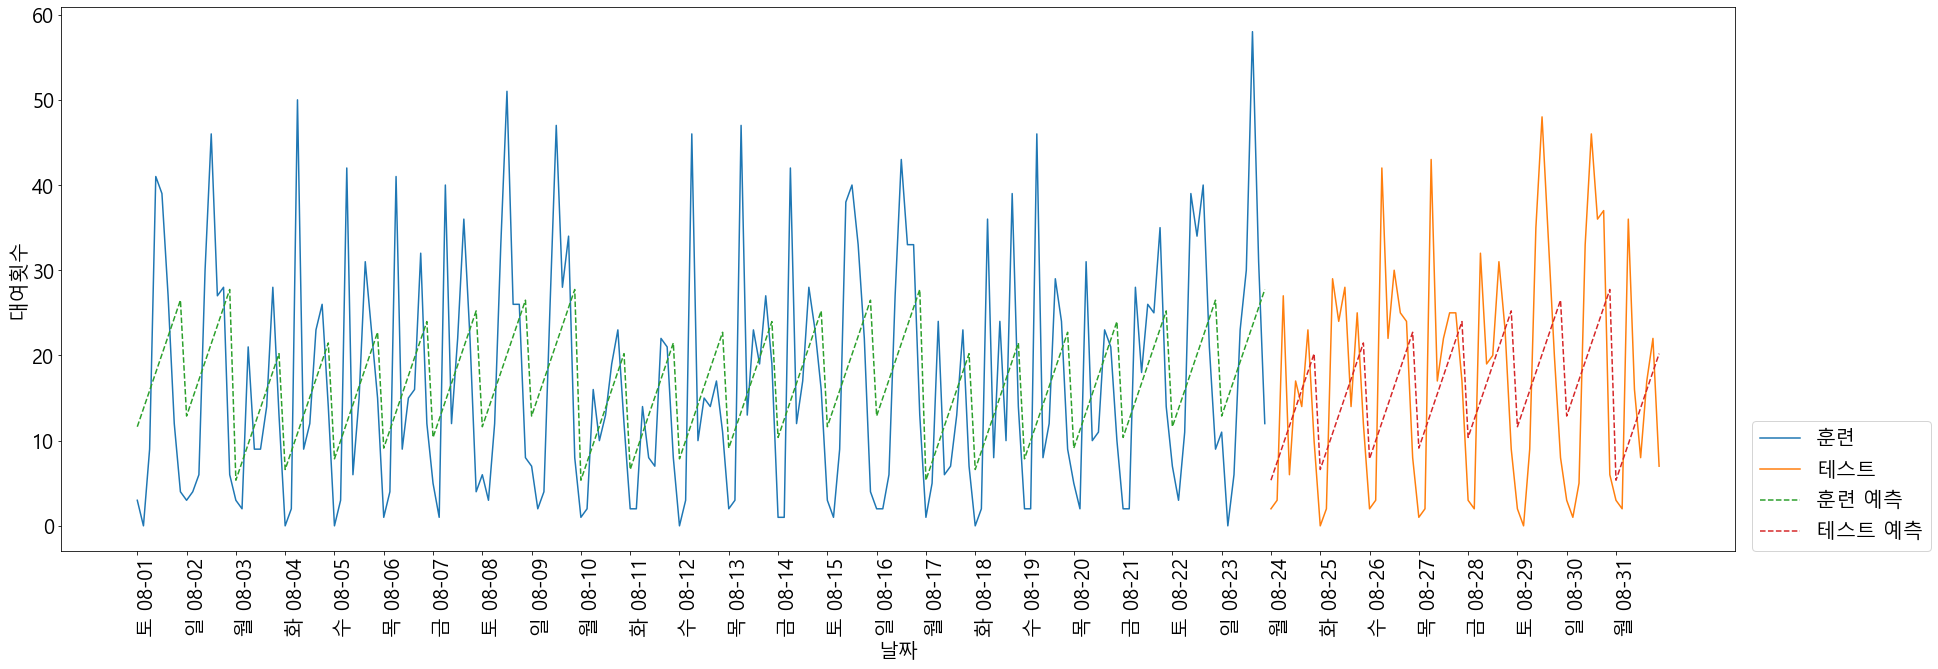

In [62]:
eval_on_features(X_hour_week, y, LinearRegression())

#일반적으로 결정계수 값이 0.20이상은 되야함 ->현재는 성능이 떨어지고 주기 패턴도 이상함
#하루의 시간이 증가할수록 대여수가 증가하는 선형 증가로 학습됨

테스트 세트 R^2: 0.62


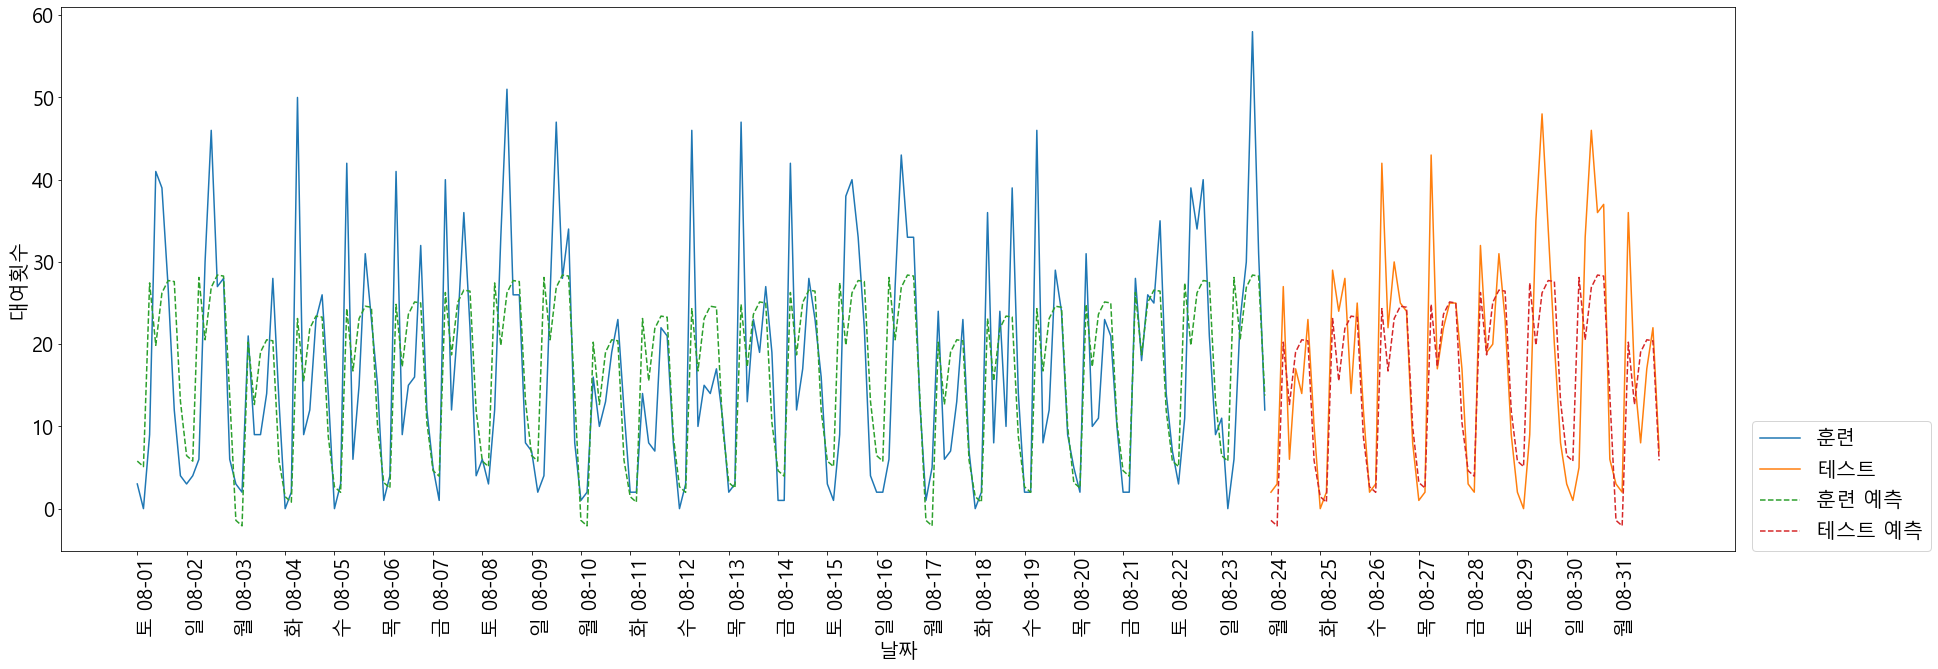

In [63]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

#원핫인코딩을 하였을 때는 선형회귀보다는 나아보이지만 제대로 주기를 예측하지는 못하는 것 같음

테스트 세트 R^2: 0.85


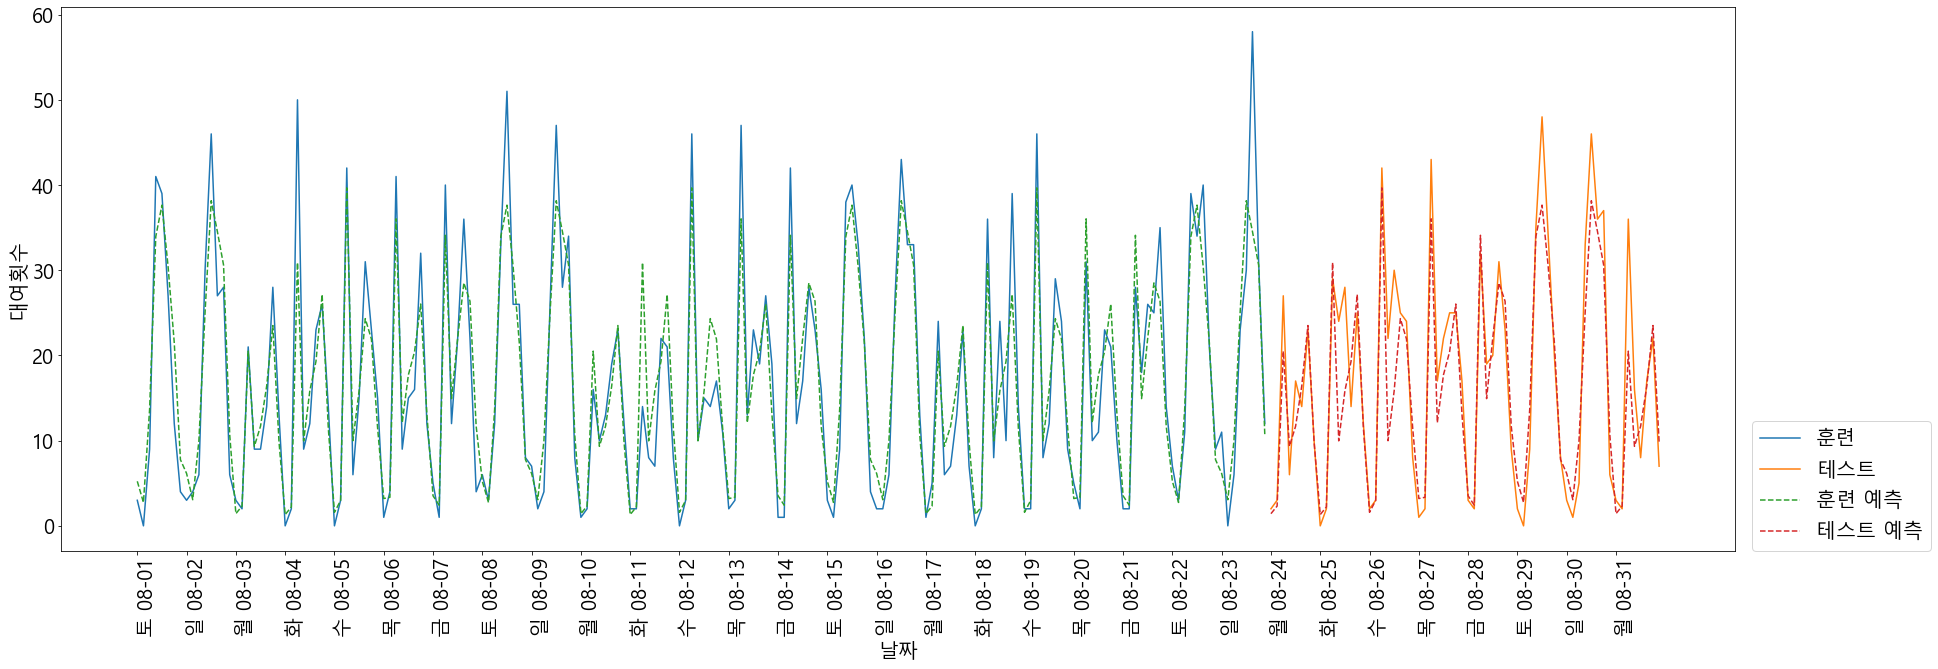

In [64]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

#상호작용 특징
#전체적으로 잘 주기를 예측하기는 하지만 살짝 아쉬움 -> 8월 31일의 경우 예측력이 떨어짐

Text(0, 0.5, '계수 크기')

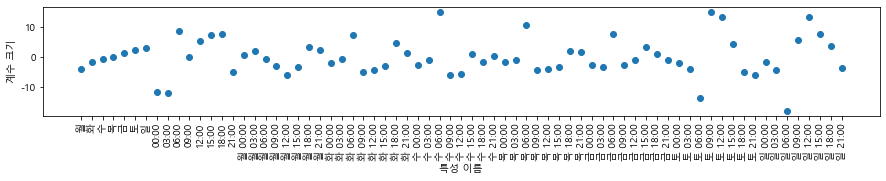

In [65]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.rc('font', size=10)
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

#시간과 요일의 곱을 사용한 선형 모델의 계수

## 요약 및 정리
### - one-hot-encoding 범주형 변수처럼 머신러닝 알고리즘에 적합한 방식으로 데이터를 표현하는 것이 아주 중요!
### - 선형모델 = 구간 분할/ 다항식과 상호작용 특성을 추가하면 성능이 더 좋아짐
### - 랜덤포레스트/SVM (비선형 모델) = 특성을 늘리지 않고도 복잡한 문제를 학습할 정도로 성능이 원래 좋은 편임